Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

If a variable is given to you, give your answer to that variable. In case of multiple choice questions, answer to the given variable. Make sure your variable has a **string value** and it contains only the letter of your choice. For example if you think that choice b is the correct choice, and the given variable is answer, your answer should look like this:

answer = 'b'

or 

answer = 'B'

If you need to read a file for a task, datafiles, such as .csv or .txt files are found in data subfolder. This can be accessed using data/filename.extension. In case of image, they are found in subfolder images. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Fahim Istiak"

---

# Multi-Modal Data Fusion - Exercise 2: Common representation


## Learning goals

After this exercise, you should
  
- be able to implement PCA on your own and use it from sklearn
- be able to implement LDA algorithm
- be able to implement bootstrapping algorithm
- know how to apply (Gradient) Boosting algorithm for classification problem



## Relevant lecture

Lecture 3.

## Relevant chapters in course book

Chapter 4.

## Additional material

- Scikit-learn https://scikit-learn.org/stable/
- Pandas https://pandas.pydata.org/docs/
- numpy https://numpy.org/doc/stable/

# Assignments

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 1: Bootstrapping</b>

<p>Implement bootstrapping (see Lecture 3) to the function stub below. You may assume that D is the dataset given as Python list. M is the number of resamples drawn and N is the number of observations in the original dataset. The function should return MxN matrix where each row contains one bootstrapped sample. 
    
Use of numpy is recommended, especially <a href='https://numpy.org/doc/stable/reference/generated/numpy.ma.size.html'>size()</a> and <a href='https://numpy.org/doc/stable/reference/generated/numpy.tile.html'>tile()</a>. Try to use as few for loops as possible.</p>

</div>

In [2]:
import numpy as np

def bootstrap(D,M):
    # Implement here
    np.random.seed(0) #Do not change or remove
    # YOUR CODE HERE
    #raise NotImplementedError()

    N = len(D)  

    bootstrapped_samples = np.random.choice(D, size=(M, N), replace=True)
    return bootstrapped_samples


Sample usage of the bootstrapping algorithm.

In [5]:
D = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]
bootstrap(D,5)

array([[ 6,  1,  4,  4,  8, 10,  4,  6,  3,  5],
       [ 8,  7,  9,  9,  2,  7,  8,  8,  9,  2],
       [ 6, 10,  9, 10,  5,  4,  1,  4,  6,  1],
       [ 3,  4,  9,  2,  4,  4,  4,  8,  1,  2],
       [10, 10,  1,  5,  8,  4,  3,  8,  3,  1]])

In [ ]:
# Your points for the Problem 1 will be given in this cell. Dont modify it.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 2: PCA</b>

<p>Implement PCA algorithm as described in Lecture 3. Use data from pca_data.csv. Compute $\mu$ and $\Sigma$ as explained in lecture slides. Find eigenvalues and eigenvectors of $\Sigma$. Pick the first principal component which corresponds to largest eigenvalue. Plot the data and first principal component in same figure. The line depicting the first principal component should start from mean $\mu$ and end in $\mu\pm u_1$, where $u_1$ is the first principal component.</p>
    
<b>Remember to save results to following variables:</b>
  <ul style="margin-top:-5px;">
    <li>mu</li>
    <li>sigma</li>
    <li>lmbda</li>
     <li>U</li>
    <li>vec1</li>
    <li>vec2</li>
  </ul>

Note: Do not use the np.cov() function to calculate sigma. To receive full marks, calculate sigma as explained in the lecture notes.
</div>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("data/pca_data.csv").values 
df = np.array(df)

In [44]:
# YOUR CODE HERE

#raise NotImplementedError()



mu = np.mean(df, axis=0)

centered_data = df - mu
n_samples = centered_data.shape[0]




sigma = (1 / (n_samples - 1)) * (centered_data.T @ centered_data)


lmbda = np.linalg.eig(sigma)[0]  #Eigenvalues

U = np.linalg.eig(sigma)[1] #Eigenvectors


principal_component_idx = np.argmax(lmbda)

principal_eigenvector = U[:, principal_component_idx]


principal_eigenvalue = lmbda[principal_component_idx]



vec1 = mu + principal_eigenvector #mu + u
vec2 = mu - principal_eigenvector #mu - u




In [45]:
print(principal_eigenvector) #for checking problem 2 & 3 FPC

[-0.6021102  -0.79841299]


In [46]:
print(principal_eigenvalue)

0.31146216370077856


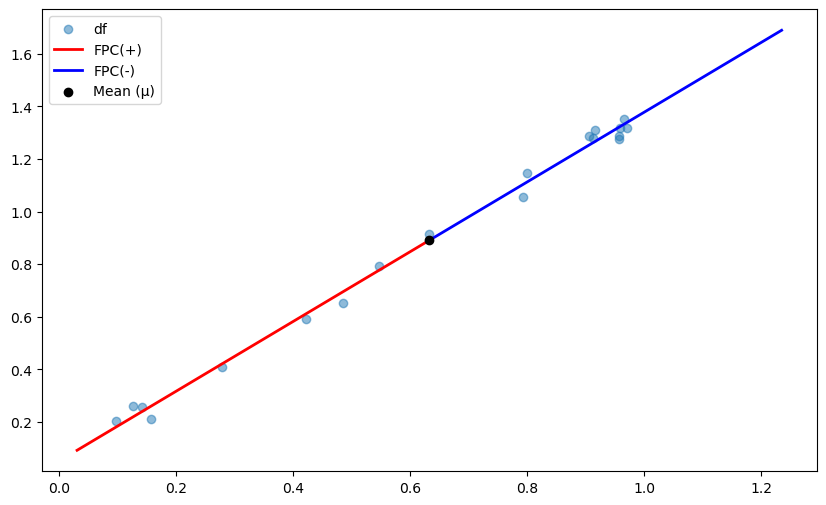

In [47]:

plt.figure(figsize=(10, 6))
plt.scatter(df[:, 0], df[:, 1], alpha=0.5, label="df")

# this is the FPC +

plt.plot(
    [mu[0], vec1[0]], [mu[1], vec1[1]],
    color="red", label="FPC(+)", linewidth=2
)
# this is the FPC -

plt.plot(
    [mu[0], vec2[0]], [mu[1], vec2[1]],
    color="blue", label="FPC(-)", linewidth=2
)

# this is for mean
plt.scatter(mu[0], mu[1], color="black", label="Mean (μ)", zorder=5)


plt.legend()
plt.show()



In [48]:
# Save results
mu = mu.tolist()       # Mean

sigma = sigma.tolist() 

lmbda = lmbda.tolist() # Eigenvalues
U = U.tolist()         # Eigenvectors


vec1 = vec1.tolist()   # μ + u
vec2 = vec2.tolist()   # μ - u

In [ ]:
# Your points for the mean calculation will be given in this cell. Do not modify it.

In [ ]:
# Your points for the sigma calculation will be given in this cell. Do not modify it.

In [ ]:
# Your points for the eigen vectors calculation will be given in this cell. Do not modify it.

In [ ]:
# Your points for the eigen values calculation will be given in this cell. Do not modify it.

In [ ]:
# Your points for the vec1 and vec2 calculation will be given in this cell. Do not modify it

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 3: PCA using sklearn</b>

<p>Consult <a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'>documentation of sklearn</a> on how to perform PCA using sklearn. Perform PCA using sklearn on same dataset as in Problem 2. Pick the model and train it (fit it) using same data as above.  Save first principal component to components variable (hint: its the components_ attribute of the pca object).

Do you get the same results? If not, what might be a reason for it?</p>


    
</div>

In [29]:
from sklearn.decomposition import PCA

In [30]:

pca = PCA(n_components=1)
# YOUR CODE HERE
#raise NotImplementedError()

pca.fit(df)

components = pca.components_ #for the fisrt component

components = components[0]



In [32]:
print(components)

[-0.6021102  -0.79841299]


In [ ]:
# Your points for the Problem 3 will be given in this cell. Dont modify it.

#### Compare results from Problem 2, and 3. Do you get the same results? If not, what might be a reason for it?


I get the same result, [-0.6021102  -0.79841299]. I think the results are identical because both implementations involve centering the data by subtracting the mean(μ), which sklearn does internally. The computations align perfectly in this case. And the dataset provided is very small and well-structured, which minimizes numerical discrepancies.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 4: LDA</b>

<p>Implement LDA algorithm as described in Lecture 3 (Textbook pages 70-73). Use data from lda_data.csv. The data consists of x coordinate, y coordinate and class label (0 or 1). Compute the quantities appearing in lecture slides. The LDA projection operator $U$ consists of single column which is the eigenvector of $H$ corresponding to the largest eigenvalue. Plot the data points with different colors for each class and the LDA subspace (line) in same figure. The line depicting the LDA subspace should start from mean $\mu_G$ and end in $\mu_G\pm u$, where $u$ is the direction of LDA subspace.</p>

<b>Remember to save results to following variables:</b>
  <ul style="margin-top:-5px;">
    <li>mu0, mu1, muG</li>
    <li>sigma0, sigma1</li>
     <li>sigmaW, sigmaB</li>
    <li>H, lmbda, U, u</li>
    <li>vec1, vec2</li>
  </ul>

Note: Do not use the np.cov() function to calculate sigma. To receive full marks, calculate sigma as explained in the lecture notes
</div>

In [49]:
data = pd.read_csv("data/lda_data.csv", header=None)
data.columns = ['x', 'y', 'class']


In [50]:
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]



mu0 = class_0[['x', 'y']].mean().values # mean x, y of the class 0
mu1 = class_1[['x', 'y']].mean().values # mean x, y of the class 1
muG = data[['x', 'y']].mean().values # Global mean x, y


In [51]:
sigma0 = np.dot((class_0[['x', 'y']].values - mu0).T, (class_0[['x', 'y']].values - mu0)) / len(class_0) # Covariance matrix for class 0
sigma1 = np.dot((class_1[['x', 'y']].values - mu1).T, (class_1[['x', 'y']].values - mu1)) / len(class_1) # Covariance matrix for class 1
sigmaW = sigma0 + sigma1 # Covariance matrix within class 0 and class 1

diff_mu = (mu0 - mu1).reshape(-1, 1)


sigmaB = sigmaB = len(class_0) * np.dot(diff_mu, diff_mu.T) + len(class_1) * np.dot(-diff_mu, -diff_mu.T) # Covariance matrix between class 0 and class1


In [52]:
H = np.linalg.inv(sigmaW).dot(sigmaB) # Discriminant Matrix -> inv(sigmaW)*sigmaB

eig_results = np.linalg.eig(H)

lmbda = eig_results[0] #Eigenvalues
U = eig_results[1] #Eigenvectors


u = U[:, 0]

In [53]:
vec1 = muG + u
vec2 = muG - u

In [ ]:
# See Lecture 3 notes 

# YOUR CODE HERE
#raise NotImplementedError()


vec1 = "Your answer here" #muG + u
vec2 = "Your answer here" #muG - u

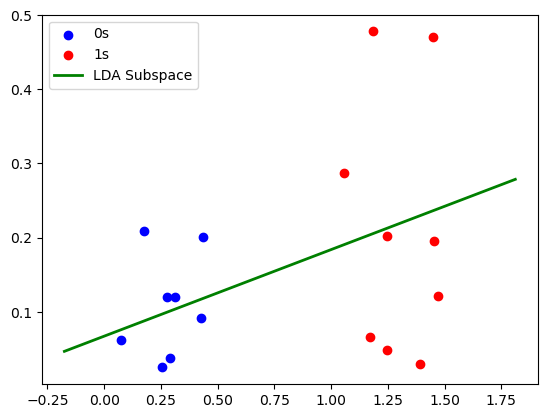

In [55]:
plt.scatter(class_0['x'], class_0['y'], color='blue', label='0s')
plt.scatter(class_1['x'], class_1['y'], color='red', label='1s')

# Plot the LDA subspace
plt.plot([vec1[0], vec2[0]], [vec1[1], vec2[1]], color='green', label='LDA Subspace', linewidth=2)

plt.legend()

plt.show()

In [ ]:
# Your points for the mean calculations will be given in this cell. Dont modify it.

In [ ]:
# Your points for the sigma calculations will be given in this cell. Dont modify it.

In [ ]:
# Your points for the H matrix calculation will be given in this cell. Dont modify it.

In [ ]:
# Your points for the eigen values calculation will be given in this cell. Dont modify it.

In [ ]:
# Your points for the eigen vectors calculation will be given in this cell. Dont modify it.

In [ ]:
# Your points for the vec_1 and vec_2 calculations will be given in this cell. Dont modify it.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 5: Boosting</b>

<p>Use the tab-separated(!) file wifi_localization.txt. The data allows to determine indoor room location from wifi signal strenghts. Last column of the file contains class labels of rooms while the first seven columns contains signal strengths of mobile phones. Split the dataset into training (70%), validation (15%) and testing sets (15%). Train GradientBoostingClassifier from sklearn using n_estimators between 1-40. Consult documentation of sklearn (or Google) on how to do this. Compute the validation score on validation set using score(). Plot scores against n. Pick the value for n giving highest score and train the model using training data. If there are multiple n with same (highest) score, choose the smallest n. For that n, plot confusion matrix for testing set.</p>

<p>Use random_state = 0 in all functions that have random_state as a parameter (train_test_split and GradientBoostingClassifier). Do not change learning rate, or give learning_rate = 0.1 as a parameter.</p>
    
<b>Remember to save results to following variables:</b>
  <ul style="margin-top:-5px;">
    <li>scores</li>
    <li>best_score</li>
     <li>ypred</li>
    <li>matrix</li>
  </ul>
</div>

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [58]:
wifi = pd.read_csv("data/wifi_localization.txt", sep="\t", header=None)

In [59]:
wifi.columns = ["Signal_1", "Signal_2", "Signal_3", "Signal_4", "Signal_5", "Signal_6", "Signal_7", "Class"]

In [60]:
X = wifi.iloc[:, :-1]  
y = wifi.iloc[:, -1] 

In [61]:
#Use random_state = 0 in all functions with that parameter

# YOUR CODE HERE
#raise NotImplementedError()

# Array of size 39 (range 1-40) with score values. 
# For index i score is calculated with n_estimators=i


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)



scores = []

for n in range(1, 41):
    clf = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=0)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_val, y_val)) 

# The index (n_estimators) of scores with the largest value (If several, choose smallest n)
best_score = scores.index(max(scores)) + 1


best_clf = GradientBoostingClassifier(n_estimators=best_score, learning_rate=0.1, random_state=0)
best_clf.fit(X_train, y_train)



# Create new gradient boosting classifier with n_estimators = best_score
ypred = best_clf.predict(X_test) # Predict class for test set 
matrix = confusion_matrix(y_test, ypred) # Confusion matrix for testing set

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

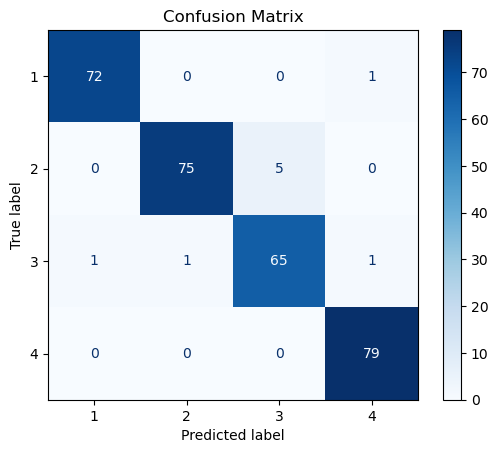

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=best_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

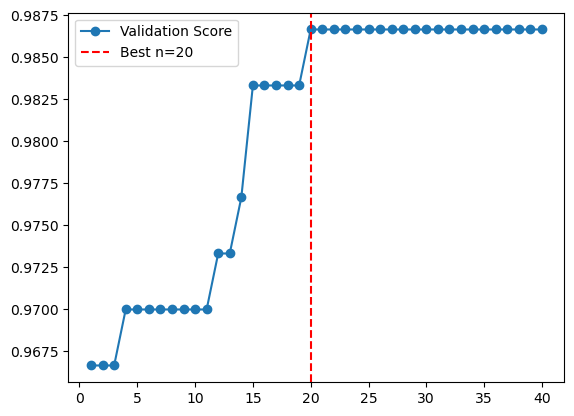

In [66]:
plt.plot(range(1, 41), scores, marker='o', label="Validation Score")

plt.axvline(x=best_score, color='red', linestyle='--', label=f'Best n={best_score}')



plt.legend()

plt.show()


In [ ]:
# Your points for the Problem 5 confusion matrix will be given in this cell. Dont modify it.

In [ ]:
# Your points for the Problem 5 predictions will be given in this cell. Dont modify it.

In [ ]:
# Your points for the Problem 5 scores will be given in this cell. Dont modify it.

In [ ]:
# Your points for the Problem 5 best score will be given in this cell. Dont modify it.

##### Have you used any generative AI tools to assist with your work on this exercise?

YES

##### If "Yes", please provide the names of those tools along with a brief explanation of how you used them.

i forgot the part where i need to organize datasets like, sep="\t", header=None. so i ask it in chatgpt and got the solution.